#PREDICT FRAUDS WITH MACHINE LEARNING MODELS

#**Introduction**
##Project Overview
In this project, we will build various predictive models to see how accurate they are in detecting whether a transaction is a normal payment or a fraud. As described in the data set, the features are scaled and the names of the features are not shown due to privacy reasons.
The models we build are important because credit card companies will be able to recognize fraudulent credit card transactions through the models, and customers will not be charged for items that they did not purchase. 

##Data Description

We’ll train our model with a data set which has 26 variables and 10,800 transactions record. The feature 'Y' is response variable and it takes value 1 in case of fraud and 0 otherwise. The other 25 variables are numerical predictors, to attempt to predict fraudulent credit card transactions. Throughput analysis, the feature 'Y' in training data set has 1062 frauds record out of 10,800 transactions, which is somehow unbalanced. The positive class (frauds) account for 9.83% of all transactions. 
Most of our variables have Na values, and the distribution of Na values is pretty balanced. Except Var22-25 don’t have any NA values, every other feature have about 2300 NA values. 

#**Starter Code**

##Loading Package

In [359]:
# General
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

#Data Processing
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

#Data Modeling
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

##Loading Data

In [360]:
train = pd.read_csv('/content/fraud_train.csv') 
test = pd.read_csv('/content/fraud_test.csv') 

#**Data Pre-processing**

##Data Analysis

In [361]:
train.head()

,Y,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25
0,0,11.9967,0.6640,9.4284,NaN,9.5841,-8.8909,6.8590,20.6198,-1.6497,...,14.6973,NaN,-3.3983,7.7124,4.7262,10.6020,21.0961,2.5314,9.8295,3.6643
1,1,7.3841,-5.8628,13.4809,4.0597,9.3176,NaN,NaN,NaN,-3.5666,...,14.8458,NaN,NaN,31.4884,21.7779,23.5737,16.7039,8.7103,2.6744,4.0920
2,0,7.1921,-1.0867,9.2162,6.6952,12.1916,5.3659,5.2984,17.2626,-2.4231,...,NaN,9.3673,-5.1032,NaN,NaN,7.0761,16.6835,5.1815,3.1877,5.9284
3,0,4.9825,NaN,NaN,7.1418,10.3485,-2.2850,NaN,NaN,NaN,...,NaN,10.3258,3.7540,15.4096,-1.3130,NaN,16.4511,6.6797,7.0225,5.4294
4,0,14.0560,NaN,8.8360,NaN,9.0164,-12.6593,4.5088,13.4253,NaN,...,15.4690,10.7742,-11.3350,9.6330,23.3530,NaN,3.6647,3.1156,0.0080,4.0965


In [362]:
test.head()

,ID,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25
0,1,8.2781,-2.4840,NaN,7.7391,8.4642,6.2852,7.2324,18.1359,NaN,...,14.1446,11.0192,-16.1145,NaN,8.2449,20.0967,1.7902,4.2489,1.7969,5.3903
1,3,10.3614,-4.2579,16.7134,5.6450,NaN,NaN,6.6844,NaN,NaN,...,14.1765,4.9560,-7.9790,23.5552,NaN,5.7637,9.9245,7.0553,8.4497,5.5468
2,4,10.9930,NaN,12.3683,8.3846,12.4445,-7.1959,NaN,NaN,NaN,...,NaN,NaN,1.9167,17.4225,5.2187,19.5462,20.7154,6.5395,0.4489,6.8641
3,5,5.9489,-0.1579,8.0233,5.6841,9.8591,-4.6346,3.9059,13.7712,1.8678,...,14.8169,7.9824,NaN,29.4874,9.2717,6.1874,11.7756,1.0252,10.3949,6.0981
4,6,11.5873,-0.0331,NaN,2.7923,9.8029,-3.8896,NaN,20.8675,NaN,...,NaN,13.1580,-10.3160,25.6607,16.6601,NaN,7.9349,4.6142,5.0315,6.3489


In [363]:
train.describe()

,Y,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25
count,10800.000000,8431.000000,8429.000000,8424.000000,8372.000000,8438.000000,8357.000000,8401.000000,8416.000000,8447.000000,...,8405.000000,8449.000000,8429.000000,8365.000000,8399.000000,8423.000000,10800.000000,10800.000000,10800.000000,10800.000000
mean,0.098333,10.692028,-1.539602,10.700727,6.819757,11.072874,-4.985175,5.405046,16.501264,0.264294,...,14.577158,9.389388,-5.792071,15.154780,12.366760,13.238417,17.251787,4.338417,3.405497,5.539400
std,0.297779,3.025084,4.025577,2.608815,2.070841,1.617926,7.878781,0.869471,3.427696,3.336670,...,0.414947,2.559180,6.791251,7.820877,7.981014,5.856747,8.159357,2.874514,4.953913,0.786945
min,0.000000,0.893500,-13.006000,3.343500,1.243900,6.154700,-27.687900,2.963200,5.749400,-9.078400,...,13.333900,1.777100,-26.933500,-7.964400,-9.300500,-1.095700,-10.089000,-4.801000,-13.134100,3.132200
25%,0.000000,8.493150,-4.622800,8.737525,5.252425,9.879150,-11.082500,4.766200,13.870875,-2.344850,...,14.257800,7.525900,-10.698300,9.193600,6.197900,8.541400,11.620125,2.153575,-0.165000,4.997925
50%,0.000000,10.525200,-1.482300,10.583200,6.822050,11.131200,-4.539400,5.389200,16.378200,0.318300,...,14.579900,9.286300,-5.709500,15.002500,12.384000,13.124200,17.232300,4.324000,3.599600,5.546650
75%,0.000000,12.766500,1.400900,12.490425,8.366050,12.229175,1.004200,6.008900,19.028450,2.925400,...,14.882600,11.116900,-0.823200,20.866300,18.415850,17.865850,23.101725,6.371025,7.108975,6.106900
max,1.000000,20.315000,8.803000,18.405500,12.870000,15.558900,16.128700,7.986200,26.928200,8.650600,...,15.741600,16.126400,15.162300,37.724300,33.455800,28.720800,44.785300,13.260000,17.914000,7.850900


In [364]:
train['Y'].value_counts()

0    9738
1    1062
Name: Y, dtype: int64

In [365]:
train.columns

Index(['Y', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8',
       'Var9', 'Var10', 'Var11', 'Var12', 'Var13', 'Var14', 'Var15', 'Var16',
       'Var17', 'Var18', 'Var19', 'Var20', 'Var21', 'Var22', 'Var23', 'Var24',
       'Var25'],
      dtype='object')

In [366]:
##Check if there is null values
train.isna().sum()

Y           0
Var1     2369
Var2     2371
Var3     2376
Var4     2428
Var5     2362
Var6     2443
Var7     2399
Var8     2384
Var9     2353
Var10    2419
Var11    2406
Var12    2421
Var13    2340
Var14    2376
Var15    2398
Var16    2395
Var17    2351
Var18    2371
Var19    2435
Var20    2401
Var21    2377
Var22       0
Var23       0
Var24       0
Var25       0
dtype: int64

In [367]:
X = train.drop("Y", axis = 1)
y = train["Y"]
print(X.shape)
print(y.shape)

(10800, 25)
(10800,)


There are 25 vairables and 10800 observations in the train dataset. In each 21 columns of the 25 variables, there are 2300-2500 observations with null values and the data is unbalanced, the positive class ('Y'=1) account for 10% of all transactions 

##Visualizing Data

###Observe the Data Balance

Text(0.5, 1.0, 'Bar Graph of 0 and 1 in Fraud Class')

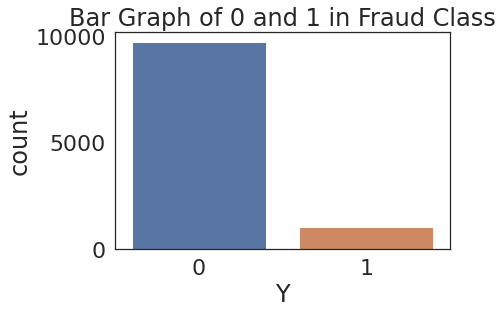

In [368]:
sns.countplot(x = y)
plt.title("Bar Graph of 0 and 1 in Fraud Class")

###Visualizing Correlation Matrix of features

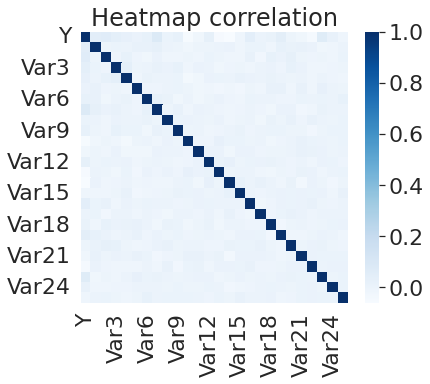

In [369]:
df = pd.DataFrame(train)
df_corr = df.corr()
plt.figure(figsize=(6,5))
sns.heatmap(df_corr, cmap='Blues')
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

As we can see, there is very less correlation between main features (Var1 to Var25)

## Scale the data

There are many missing values in the data, which could cause problems with the training of our model later on. The features are all numeric data and the dataset is medium, as we observed before, therefore, we choose to replace missing values with columns' median.

In [370]:
num_cols = ['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8',
       'Var9', 'Var10', 'Var11', 'Var12', 'Var13', 'Var14', 'Var15', 'Var16',
       'Var17', 'Var18', 'Var19', 'Var20', 'Var21', 'Var22', 'Var23', 'Var24',
       'Var25']
num_si_step = ('si', SimpleImputer(strategy='median'))
num_ss_step = ('ss', StandardScaler())
num_steps = [num_si_step, num_ss_step]

num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, num_cols)]

ct = ColumnTransformer(transformers=num_transformers)

X_num_transformed = ct.fit_transform(train)
X_num_transformed.shape

(10800, 25)

In [371]:
labels = train['Y'].values
labels.shape

(10800,)

##Feature Selection

Feature importance scores can be used for feature selection. We calculate the feature importance score using the Extreme Gradient Boosting Classifier, a new method to us. We try it because it can handle the NA values and we want the feature selection can be independent from missing values imputation. The plot shows that the fscores of the variables are relatively even. Based on the feature importance score and correlation matrix, we decide using all the features to train the model.

In [372]:
#Calculate F Score using XGBClassifier
xgb = XGBClassifier()
xgb.fit(X, y)

print(xgb.feature_importances_)

[0.04133776 0.05112833 0.03696365 0.0366514  0.03879234 0.03617461
 0.04874695 0.03297965 0.03630921 0.04380286 0.03478123 0.04296348
 0.04893994 0.04453174 0.04247182 0.03954437 0.03496708 0.03346421
 0.0451227  0.03806745 0.03399083 0.0432881  0.04849649 0.03049842
 0.03598537]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


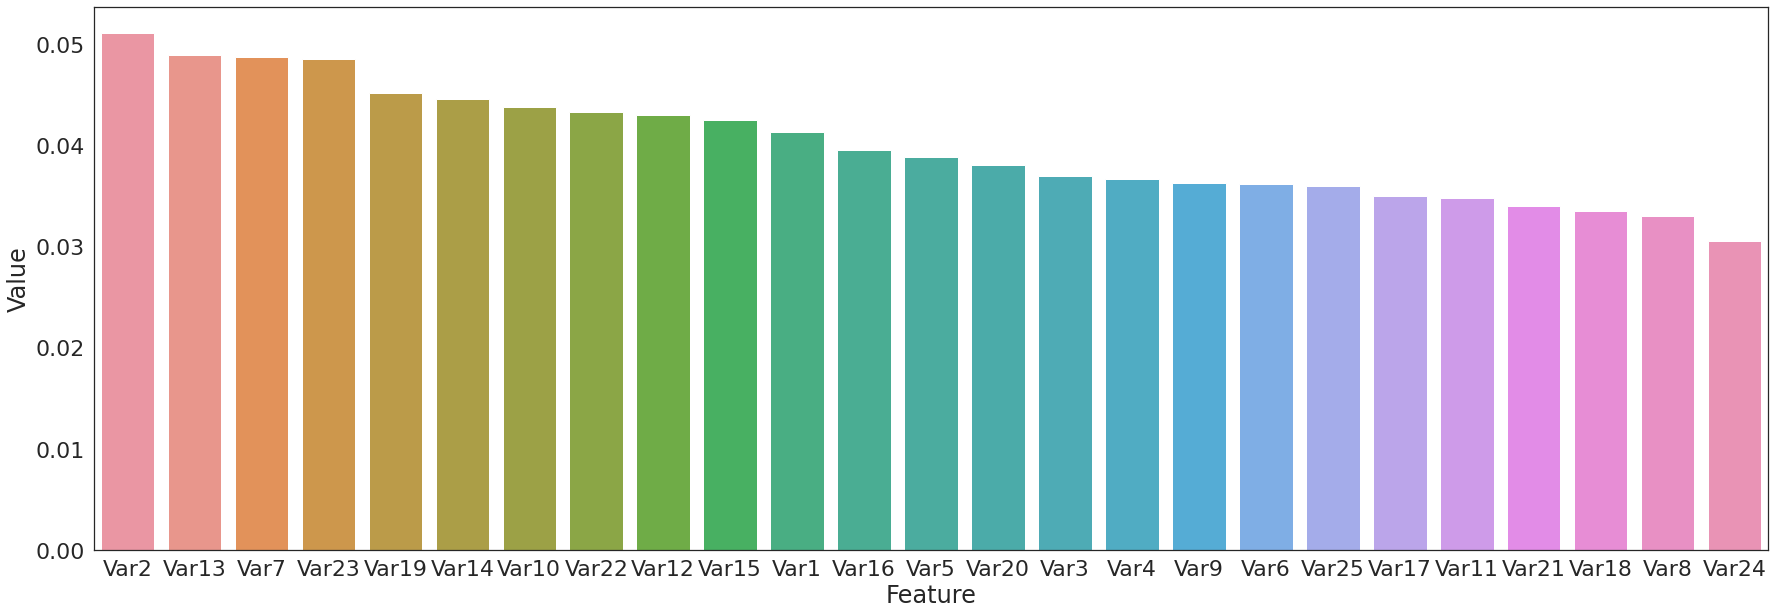

In [373]:
f_xgb = pd.DataFrame(data={'Feature':X.columns,'Value':xgb.feature_importances_})
f_xgb = f_xgb.sort_values(['Value'],ascending=False )
plt.figure(figsize=(15,8))
sns.barplot(f_xgb['Feature'],f_xgb['Value'])
plt.gcf().set_size_inches(30,10)

##Train-Test Split

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X_num_transformed, labels,test_size=.1, random_state=0)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)
print(y_train.shape)

(9720, 25)
(1080,)
(1080, 25)
(9720,)


#**Baseline Models**

This part examines five classification models including Logistic Regression, KNeighborsClassifier, Random Forest, GradientBoostingClassifier, and HistGradientBoostingClassifier with their default parameters. We chose HistGradientBoostingClassifier because there are NA values in the raw data, and the model can be trained with missing values, so we will train it with raw data. Next, we'll select one model to tune parameters. Accuracy is mainly measured by ROC-AUC, but accuracy score and classification report will also be considered.

##Logistic Regression

In [375]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [376]:
pred_proba_lr = lr.predict_proba(X_test)[:,1]
pred_proba_lr

array([0.27977383, 0.10491382, 0.1340248 , ..., 0.09007307, 0.12578598,
       0.1390702 ])

In [377]:
print(accuracy_score(y_test, pred_lr))
roc_auc_score(y_test, lr.decision_function(X_test))

0.9


0.6054907788446883

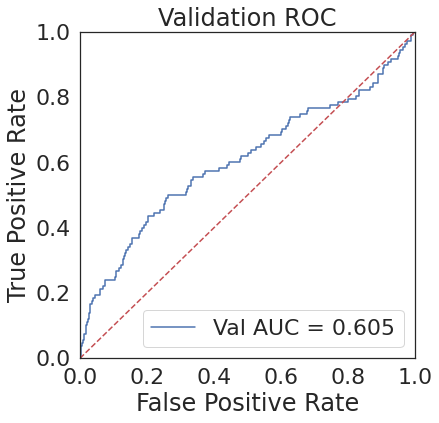

In [378]:
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba_lr)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [379]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       972
           1       0.00      0.00      0.00       108

    accuracy                           0.90      1080
   macro avg       0.45      0.50      0.47      1080
weighted avg       0.81      0.90      0.85      1080



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##KNN

In [380]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [381]:
pred_proba_k = knn.predict_proba(X_test)[:,1]
pred_proba_k

array([0.2, 0. , 0.2, ..., 0.2, 0. , 0. ])

In [382]:
print(accuracy_score(y_test, pred_knn))
roc_auc_score(y_test, pred_proba_k)

0.8944444444444445


0.5346841182746533

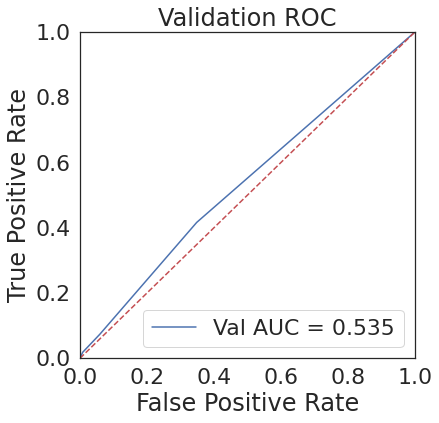

In [383]:
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba_k)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [384]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       972
           1       0.20      0.02      0.03       108

    accuracy                           0.89      1080
   macro avg       0.55      0.51      0.49      1080
weighted avg       0.83      0.89      0.85      1080



##Random Forest

In [385]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

In [386]:
pred_proba_rf = rf.predict_proba(X_test)[:,1]
pred_proba_rf

array([0.23, 0.1 , 0.11, ..., 0.08, 0.07, 0.07])

In [387]:
print(accuracy_score(y_test, pred_rf))
roc_auc_score(y_test, pred_proba_rf)

0.899074074074074


0.6200988797439414

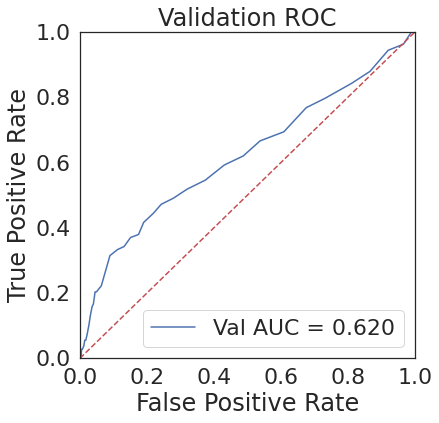

In [388]:
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba_rf)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [389]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       972
           1       0.00      0.00      0.00       108

    accuracy                           0.90      1080
   macro avg       0.45      0.50      0.47      1080
weighted avg       0.81      0.90      0.85      1080



##Gradient Boosting Classifier

In [390]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
pred_GBC = GBC.predict(X_test)

In [391]:
pred_proba_GBC = GBC.predict_proba(X_test)[:,1]
pred_proba_GBC

array([0.26328101, 0.07258158, 0.09365214, ..., 0.08291227, 0.10063384,
       0.09623653])

In [392]:
print(accuracy_score(y_test, pred_GBC))
roc_auc_score(y_test, pred_proba_GBC)

0.8981481481481481


0.6203894223441548

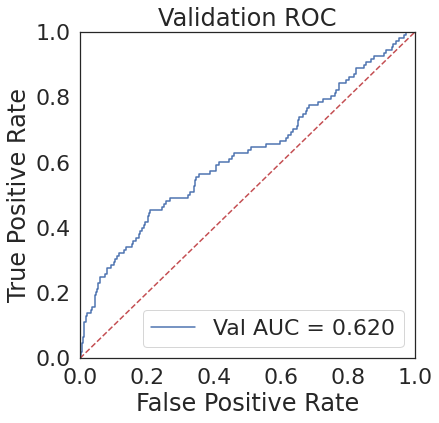

In [393]:
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba_GBC)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [394]:
print(classification_report(y_test, pred_GBC))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       972
           1       0.33      0.02      0.04       108

    accuracy                           0.90      1080
   macro avg       0.62      0.51      0.49      1080
weighted avg       0.84      0.90      0.86      1080



##HistGradientBoostingClassifier 

In [395]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,test_size=.1)

In [396]:
pd.DataFrame(X_train1)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25
7404,6.3020,-6.2594,9.8574,6.9316,8.6801,0.5442,6.2204,NaN,-1.0223,6.9150,...,13.7930,11.5912,-0.3673,6.7823,22.0531,16.6981,10.6262,0.4266,4.3727,6.7186
7823,16.2131,NaN,14.6117,5.1260,NaN,NaN,5.7025,NaN,-1.4550,8.1899,...,14.4793,4.0788,-13.4581,12.2513,5.9688,21.3414,11.6041,6.4722,2.1484,6.7953
504,10.8382,0.4223,7.7905,8.4910,9.1841,-7.2718,NaN,15.2296,5.2442,9.8734,...,NaN,9.8767,NaN,NaN,NaN,5.5566,15.6346,5.3405,5.8797,5.0843
9512,12.3717,-0.7374,8.9582,4.9482,10.3156,-6.4860,NaN,20.2737,NaN,8.8533,...,14.7275,NaN,-12.4020,5.8150,18.9561,15.6081,24.5760,3.3122,6.4880,3.8583
7421,15.1114,0.9359,15.4063,5.8997,11.0361,-17.9907,NaN,14.0604,-3.0555,6.1340,...,14.0641,6.6566,-10.8661,14.1839,NaN,11.7030,10.2082,4.6842,3.0490,5.9568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,6.0463,NaN,12.6329,6.6294,9.2953,4.0116,5.4612,12.5536,NaN,8.2288,...,NaN,7.3113,NaN,23.9325,17.9881,7.2427,19.5322,7.9367,-0.2066,5.2988
1183,12.7043,NaN,10.8366,12.1264,8.8449,3.7087,5.3716,21.5695,NaN,NaN,...,NaN,5.8715,-8.6373,14.2338,11.5824,12.0336,13.6569,5.2709,-3.5544,5.1016
10512,9.0427,NaN,9.5443,NaN,NaN,-0.7791,NaN,17.5419,-3.9030,7.8986,...,13.6471,6.9440,-6.5668,31.2588,3.9774,-0.2563,6.6911,2.6729,-3.3829,5.8166
4117,14.8195,5.8222,10.5616,NaN,9.7147,NaN,5.3787,22.2014,6.3506,7.8949,...,13.9347,14.1338,NaN,13.2359,-0.1516,NaN,12.5811,2.1807,4.2291,5.8656


In [397]:
HGB = HistGradientBoostingClassifier()
HGB.fit(X_train1, y_train1)
pred_HGB = HGB.predict(X_test1)

In [398]:
pred_proba_HGB = HGB.predict_proba(X_test1)[:,1]
pred_proba_HGB

array([0.05571966, 0.12678995, 0.08010094, ..., 0.07326192, 0.0717292 ,
       0.14123194])

In [399]:
print(accuracy_score(y_test1, pred_HGB))
roc_auc_score(y_test1, pred_proba_HGB)

0.9064814814814814


0.6294545866411311

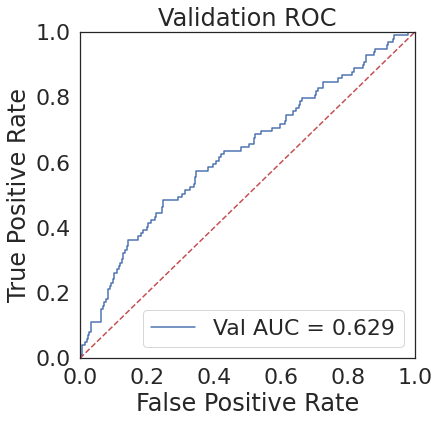

In [400]:
fpr, tpr, threshold = metrics.roc_curve(y_test1, pred_proba_HGB)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [401]:
print(classification_report(y_test1, pred_HGB))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       981
           1       0.00      0.00      0.00        99

    accuracy                           0.91      1080
   macro avg       0.45      0.50      0.48      1080
weighted avg       0.82      0.91      0.86      1080



##Model Selection
Based on the many experiments we tried, we chose Logistic Regression for further training, which is our best performing model in the competition.

Text(0.5, 1.0, 'Comparsion of Different Models')

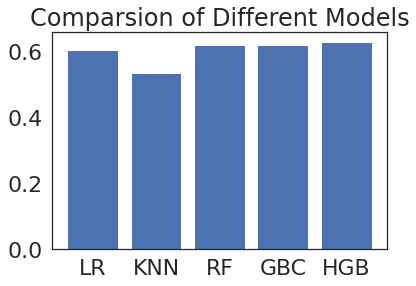

In [402]:
keys = ['LR','KNN','RF','GBC','HGB']
values=[roc_auc_score(y_test, pred_proba_lr),roc_auc_score(y_test, pred_proba_k),roc_auc_score(y_test, pred_proba_rf),roc_auc_score(y_test, pred_proba_GBC),roc_auc_score(y_test1, pred_proba_HGB)]
plt.bar(keys,values)
plt.title('Comparsion of Different Models')

#**Further Training of Selected Model**

##Balancing Data with SMOTE

In [403]:
oversample = SMOTE(random_state=0)
X_train_s, y_train_s = oversample.fit_resample(X_train, y_train)
# Prepare for hyperparamater tuning
X_s, y_s = oversample.fit_resample(X_num_transformed, labels)

In [404]:
print(X_train_s.shape)
print(y_train_s.shape)

(17532, 25)
(17532,)


##Hyperparameters tuning with GridSearchCV

In [405]:
C_vals = [1e-05,1e-06, 0.00001 ,0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
class_weight = ['balanced',{0: 0.6, 1: 0.4},'None']
cv = StratifiedShuffleSplit(n_splits=10, test_size= .25, random_state=0)
param = {'C':C_vals, 'class_weight':class_weight}

lr=LogisticRegression()

grid = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid = param,
    scoring = 'roc_auc',
    n_jobs= -1,
    cv=cv,
    error_score='raise'
)

grid.fit(X_train_s, y_train_s)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.25,
            train_size=None),
             error_score='raise', estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1e-05, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                               10, 100],
                         'class_weight': ['balanced', {0: 0.6, 1: 0.4},
                                          'None']},
             scoring='roc_auc')

In [406]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6627872359386608
{'C': 0.001, 'class_weight': {0: 0.6, 1: 0.4}}
LogisticRegression(C=0.001, class_weight={0: 0.6, 1: 0.4})


To get a better model, we must deal with the unbalance of data. Due to the size of our dataset, we chose oversampling rather than undersampling since undersampling could result in the loss of important information.

##Model Performance with Balanced Data and Best Hyperparameters

In [407]:
lr = LogisticRegression(C=0.001, class_weight={0: 0.6, 1: 0.4})
lr.fit(X_train_s, y_train_s)
pred_lr = lr.predict(X_test)

In [408]:
pred_proba_lr = lr.predict_proba(X_test)[:,1]
pred_proba_lr

array([0.6028086 , 0.41010858, 0.44072951, ..., 0.39691499, 0.45397674,
       0.46611845])

In [409]:
print(accuracy_score(y_test, pred_lr))
roc_auc_score(y_test, lr.decision_function(X_test))

0.8305555555555556


0.6006992074378905

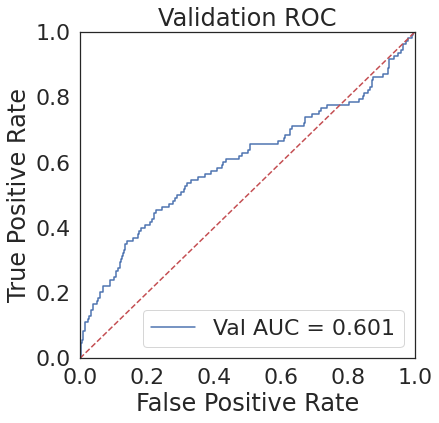

In [410]:
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba_lr)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [411]:
print(classification_report(y_test, pred_lr))
cm=confusion_matrix(y_test, pred_lr)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       972
           1       0.21      0.25      0.23       108

    accuracy                           0.83      1080
   macro avg       0.56      0.57      0.57      1080
weighted avg       0.84      0.83      0.84      1080



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


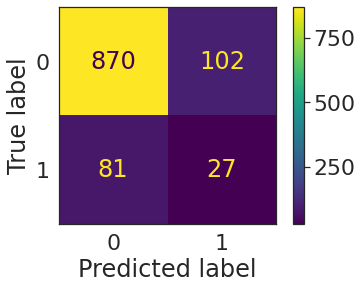

In [412]:
plot_confusion_matrix(lr , X_test , y_test)

#**Conclusion**







##Findings

*   The good and stable perfermance of Logsitic Regression can be the reason why it is one of the most popular methods to classification cases in the real world. 
*   Algorithms could be fancy and powerful, but making the dataset informative and clean is essential to feed into our models and get a better performance. In this project, we did't show all the experiments we tried, but changing the way how we fill in NA value or the methods we balance the data lead a bigger change than tuning the parameters. Both Gradient Boosting Classifier and Hist Gradient Boosting Classifer get a much better performance after we balanced the data with SMOTE.
*   In the process of this project, we became more familiar with data pre-processing and the training of different models. Also, in order to improve the performance of our models and get better results in the competition, we learned a lot of models and data pre-processing methods that we did not know before, which was very exciting and greatly stimulated our interest in machine learning.

##Output Prediction of Test Data

Although we tuning the best hyperparameters, but the best performance of our all the submissions is the one with default hyperparameters. It does not mean what we done before is not useful, but the model with default parameters perform better in this test dataset.

In [413]:
# use whole train data after transformation and balancing to fit the model

lr = LogisticRegression()
lr.fit(X_s, y_s)

x_pre = ct.fit_transform(test)
x_pre.shape

predict_lr2 = lr.predict_proba(x_pre)[:,1]
predict_lr2

array([0.47527007, 0.68707136, 0.43246044, ..., 0.30978369, 0.48622168,
       0.51958333])

In [156]:
ID = np.arange(1,x_pre.shape[0]+1)
d = {'ID': ID, 'Y': predict_lr2}
out = pd.DataFrame(d)
out.to_csv('/content/pred_ready_0.65980.csv', 
    index = False)